The first step is to create a Reddit account. If you don't already have one, go ahead and sign up. Next, go to [https://www.reddit.com/prefs/apps](https://www.reddit.com/prefs/apps) and create your API key. Make sure to select the **script** checkbox when setting it up (see following Figure). Additionally, be sure to read and comply with the API usage terms to ensure they align with the purpose of your application. You can find the terms here: [Reddit API Terms](https://redditinc.com/policies/data-api-terms).

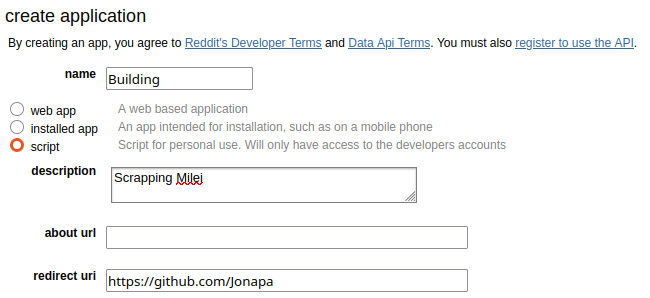

Now, you should be able to retrieve the **personal use script** (which we will refer to as `CLIENT_ID`) and the **secret key** (referred to as `SECRET_KEY`). These keys are personal and **SHOULD NOT BE SHARED**. Moreover, the username and password are also required to access the API.

In [1]:
###################### TODO: ENTER YOUR CLIENT_ID, SECRET_KEY, USERNAME & PASSWORD
CLIENT_ID =
SECRET_KEY =
USERNAME =
PASSWORD =

We will use the **praw** library, as it offers a wide array of functionalities for Reddit posts scraping. To achieve this, we will install the library using the following command:

In [2]:
!pip install --upgrade https://github.com/praw-dev/praw/archive/main.zip

     / 24.7 MB 5.6 MB/s 0:00:03
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for praw: filename=praw-7.8.2.dev0-py3-none-any.whl size=180164 sha256=911e14a7344f900fb0c651e85a46e3a3e8128966a0e0a552c36df127f0d5a85f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fnfcxv_z/wheels/b9/4d/21/dc3064557fd76846bc4c0b0fdeaeb8a0ea51c6f425317f69b3
Successfully built praw


We will now instantiate the `reddit` object with the necessary credentials.

In [3]:
import praw

reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    password=PASSWORD,
    user_agent='MyAPI/0.0.1',
    username=USERNAME,
    check_for_async=False,
)

In [4]:
del CLIENT_ID, SECRET_KEY, USERNAME, PASSWORD

Each Reddit post has a unique alphanumeric identifier (`post_id`) that distinguishes it from others. This identifier is included in the post's URL:  

`https://www.reddit.com/r/{subreddit}/comments/{post_id}/{post_title}`  

However, since the library handles URL processing internally, there is no need to extract individual components. In other words, the entire URL can be provided as a parameter.

In [5]:
urls = ["https://www.reddit.com/r/argentina/comments/1iuaq5x/ahora_el_presidente_javier_milei_junto_al/",
"https://www.reddit.com/r/argentina/comments/1iubzxt/aparece_un_milei_salvaje_a_darle_la_motosierra_a/",
"https://www.reddit.com/r/argentina/comments/1iosqcr/el_presidente_milei_te_explica_el_22_de_inflacion/",
"https://www.reddit.com/r/argentina/comments/1ipeb2m/la_econom%C3%ADa_de_argentina_es_otra_con_milei_la/",
"https://www.reddit.com/r/argentina/comments/1dfdjwt/la_inflacion_mensual_dio_menos_que_en_2022/",
"https://www.reddit.com/r/argentina/comments/1cih9en/la_inflaci%C3%B3n_mensual_casi_en_niveles_menores_a_la/",
"https://www.reddit.com/r/argentina/comments/1fejsyz/la_inflaci%C3%B3n_de_agosto_fue_del_42/",
"https://www.reddit.com/r/argentina/comments/1bzliux/bot_de_jumbo_la_cuenta_de_twitter_que_us%C3%B3_milei/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1itax7d/no_hay_plata/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1iojw43/se_la_pasa_boludeando_en_tuiter/",
"https://www.reddit.com/r/argentina/comments/1is19dv/video_santiago_caputo_fren%C3%B3_una_respuesta_de/",
"https://www.reddit.com/r/argentina/comments/1guzeb9/hoy_se_cumple_un_a%C3%B1o_de_esto/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1is05al/di_lo_tuyo_ponziduende/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1iqvlrh/si_no_lo_hacemos_mierda_a_milei_por_estafar_a_sus/",
"https://www.reddit.com/r/argentina/comments/1hc1lng/la_inflaci%C3%B3n_volvi%C3%B3_a_caer_y_fue_la_m%C3%A1s_baja/",
"https://www.reddit.com/r/argentina/comments/14jox9m/elecciones/",
"https://www.reddit.com/r/argentina/comments/1irx94o/milei_es_inocente/",
"https://www.reddit.com/r/argentina/comments/17yvexs/megathread_elecciones_presidenciales_argentina/",
"https://www.reddit.com/r/argentina/comments/15xlpa8/elecciones_2023/",
"https://www.reddit.com/r/argentina/comments/17za680/resultados_de_la_eleccion/",
"https://www.reddit.com/r/argentina/comments/17zaa5z/milei_ahora/",
"https://www.reddit.com/r/argentina/comments/rln6mx/javier_milei_votando_en_contra_de_aumentar/",
"https://www.reddit.com/r/argentina/comments/pnf9ic/javier_milei_emocionado_en_su_b%C3%BAnker_despu%C3%A9s_de/",
"https://www.reddit.com/r/argentina/comments/15r9eyo/que_van_a_decir_ahora/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1iq0txd/juicio_pol%C3%ADtico_al_presidente_y_todo_su_gabinete/",
"https://www.reddit.com/r/argentina/comments/1d80d1e/si_me_esperan_5_minutos_bajo_milei_bajo_a_saludar/",
"https://www.reddit.com/r/RepublicaArgentina/comments/180o93j/trump_felicita_a_javier_milei_por_la_victoria/",
"https://www.reddit.com/r/RepublicaArgentina/comments/17zpg49/milei_no_es_culpable_de_lo_que_pase_de_a_partir/",
"https://www.reddit.com/r/RepublicaArgentina/comments/1fgbsk6/porque_ser_libertario_de_milei_es_por_sobre_todas/",
"https://www.reddit.com/r/argentina/comments/18f6luk/el_discurso_de_milei_basicamente/"
]

By using the `submission` method and passing the aforementioned URLs, we can retrieve all the main comments (`comments` attribute) of the post, along with additional useful information (https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). Since we are only interested in the comments text, we will extract only that.  

It is worth noting that nested comments and threads can also be retrieved by using the `.list()` method of the `comments` attribute.

In [6]:
import re
import pandas as pd

all_data = []

for url in urls:
  comment_list = []
  post = reddit.submission(url=url)
  post.comment_sort = "top"
  post.comments.replace_more(limit=None)
  post_id = re.search(r"comments/([a-zA-Z0-9]+)", url).group(1)
  # In order to get all comments (including nested), use post.comments.list()
  for comment in post.comments:
    comment_list.append({
      'score': comment.score,
      'body': comment.body.strip(),
    })

  comment_list = pd.DataFrame(comment_list)
  # display(comment_list)
  all_data.append((post_id, comment_list))
del url, urls, reddit, post_id, post, comment, comment_list

For each URL, we will generate a `pandas.DataFrame`, which will then be converted into a sheet in an Excel-like file.

In [7]:
with pd.ExcelWriter("comments.xlsx") as writer:
  for post_id, df in all_data:
    df.to_excel(writer, sheet_name=post_id, index=False, header=True)